# Online Retail Case Study

Problem Statement: An UK based client company wants to improve their sales and customer loyalty for which they want to know the steps to reach their goal.

Objective: Perform analytics to increase sales and improve customer loyalty for a UK based retail client based on given data. 


Here we have to perform two different types of analysis, one is for customer loyalty and another to improve sales. 



In [1]:
# Importing libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
!pip install plotly
import plotly.express as px

In [2]:
# Importing Dataset 

customer_data = pd.read_excel("E:/Dataset/Online Retail.xlsx")

# Exploring the given data

In [3]:
# Finding different variables in data

columns = customer_data.columns.values.tolist()
print(columns)

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDateTime', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate', 'InvoiceTime']


1. There are total of 10 variables in data.
2. There were 8 columns in data initially. As both date and time were given in a single cellwith column name "InvoiveDateTime". So, they were split into two different columns "Invoice Date" and "Invoice Time" to get a proper date and time format.  

In [4]:
#To know the shape of data.

customer_data.shape

(541909, 10)

In [5]:
#To get get a fair idea about datatypes of variables we have.

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo          541909 non-null object
StockCode          541909 non-null object
Description        540455 non-null object
Quantity           541909 non-null int64
InvoiceDateTime    541909 non-null datetime64[ns]
UnitPrice          541909 non-null float64
CustomerID         406829 non-null float64
Country            541909 non-null object
InvoiceDate        541909 non-null datetime64[ns]
InvoiceTime        541909 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 41.3+ MB



It is very important to have enough no of samples from given data to move forward with further analysis. For that we have to find the no. of customers based on "CustomerId" for every "Country" in given data.

Here We have choosen "Country" as our main variable for analysis because the data is from different parts of the world and we need to be particular about data gathered. 


In [6]:
# Checking the no. of customers per "Country" 

customers_per_country = customer_data[['Country','CustomerID']].drop_duplicates()

#As we have removed the duplicates. Now we have to group the customerID and get count according to country name.

customers_per_country.groupby(['Country']).agg({'CustomerID' : 'count'}).sort_values('CustomerID',ascending = False)

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


We can clearly see that "United Kingdom" have the highest number of customers and rest of the country's do not have enough data. 

Now we are dropping countries except "United Kingdom" for futher analysis on customer behaviour.

In [7]:
#It is always good to have copy of given data before we make any changes in it. 

customer_data_copy = customer_data.copy()

In [8]:
#filtering out the data set for UK only

customer_data = customer_data[customer_data['Country'] == 'United Kingdom'].reset_index(drop = True)

In [9]:
#checking the null values from given data

customer_data.isna().sum()

InvoiceNo               0
StockCode               0
Description          1454
Quantity                0
InvoiceDateTime         0
UnitPrice               0
CustomerID         133600
Country                 0
InvoiceDate             0
InvoiceTime             0
dtype: int64

Above we can see that "description" and "CustomerID" are the variables which have null values. 

Now we will drop the columns which does not have "CustomerID" because those are the fields which are identified uniquely while "Description" of the item can be found by using similar "StockCode". 

In [10]:
#Dropping the rows where customerID is missing

customer_data = customer_data[pd.notnull(customer_data['CustomerID'])]

#verifying null values in customerID.
customer_data.CustomerID.isna().sum()

0

In [11]:
#Checking the description of the data
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


From summary data we have seen the 5 number analysis, mean and standard deviation for variables individually. 

We can see that quantity has min of -80995.000000 which is practically not possible in real life. It should be anything more than "0" to consider it as a sale. As quantity increases price for all items also increase which will generate a sale for our client. 	

In [12]:
#filtering data for positive quantity values

customer_data = customer_data.query("Quantity > 0")

#To check the min of Quantity. 
min(customer_data.Quantity)

1

Creating "Year" and "Total Amount" varibales to compare the sales YoY.

In [13]:
#Creating Year data

customer_data['Year'] = pd.DatetimeIndex(customer_data['InvoiceDate']).year
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceTime,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010


In [14]:
#Creating total amount data

customer_data['TotalAmount'] = customer_data['UnitPrice']*customer_data['Quantity']
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceTime,Year,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,20.34


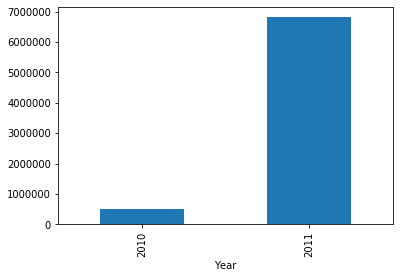

In [15]:
#Comparing yearly sales


customer_data.groupby('Year')['TotalAmount'].sum().plot(kind='bar')

From the above chat we can clearly observe the year 2010 does not have enough amount of data for that particular year, while 2011 have the data for whole year. So, we are considering 2011 year data to understand sales monthly.

In [16]:
customer_data.InvoiceDateTime = pd.to_datetime(customer_data['InvoiceDateTime'], format='%d-%m-%Y %H:%M')

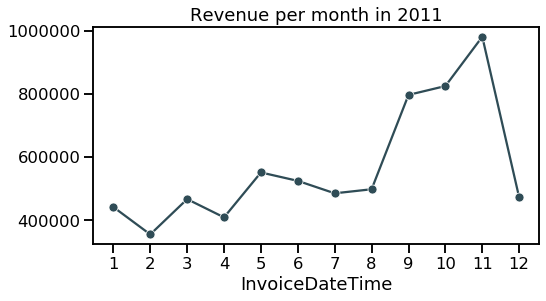

In [17]:
# Let's visualize the top grossing months
retail_month = customer_data[customer_data.InvoiceDateTime.dt.year==2011]
monthly_gross = retail_month.groupby(retail_month.InvoiceDateTime.dt.month).TotalAmount.sum()

plt.figure(figsize=(8,4))
sns.set_context("talk")
sns.set_palette("PuBuGn_d")
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o')
plt.xticks(range(1,13))
plt.title("Revenue per month in 2011")
plt.show()

Revenue is gradually inceasing from "august" till "December". 

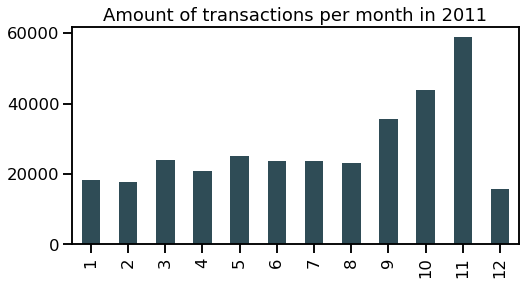

In [18]:
#amount of transactions per month
plt.figure(figsize=(8,4))
customer_data[customer_data.InvoiceDateTime.dt.year==2011].InvoiceDateTime.dt.month.value_counts(sort=False).plot(kind='bar')
plt.title("Amount of transactions per month in 2011")
plt.show()

Highest no. of transactions can be seen in "November".

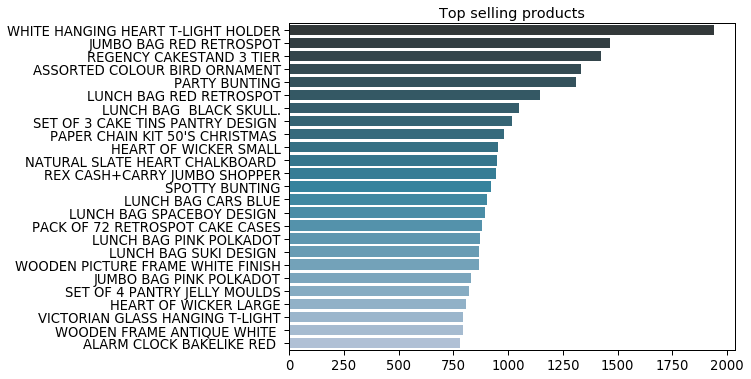

<Figure size 432x288 with 0 Axes>

In [19]:
# Let's visualize some top products from the whole range


top_products = customer_data['Description'].value_counts()[:25]
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values, 
           palette='PuBuGn_d')
plt.title("Top selling products")
plt.show()
plt.savefig('top_products.png')

The above mentioned chart explains us the top 25 selling products. It can be seen that "White Hanging heart T-light Holder". 

In [20]:
# For recency will check what was the last date of transaction
#First will convert the InvoiceDate as date variable

customer_data['InvoiceDateTime']=pd.to_datetime(customer_data['InvoiceDateTime'])
customer_data['InvoiceDateTime'].max()

Timestamp('2011-12-09 12:49:00')

So, the last date was 2011-12-09 for transaction. So will take latest date for benchmark as 2011-12-10, for the calculation of the Recency.

In [21]:
#RFM factors calculation:
Latest_date = dt.datetime(2011,12,10)
RFM_data = customer_data.groupby('CustomerID').agg({'InvoiceDateTime' : lambda x :(Latest_date - x.max()).days,
                                          'InvoiceNo' : 'count','TotalAmount' : 'sum'}).reset_index()

#converting the names of the columns
RFM_data.rename(columns = {'InvoiceDateTime' : 'Recency',
                          'InvoiceNo' : "Frequency",
                          'TotalAmount' : "Monetary"},inplace = True)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [22]:
RFM_data.describe()

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,90.371079,1863.910113
std,1576.823683,99.528532,217.796155,7481.922217
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,17.000000,17.000000,300.040000
50%,15569.000000,50.000000,41.000000,651.820000
75%,16913.000000,142.000000,99.000000,1575.890000
max,18287.000000,373.000000,7847.000000,259657.300000


From the above statistics we can see that average recency of customers is 92 days, an average customer is purchasing the product 90 times and spending an average of 1863.91 unitprice.